# House of Dragons
- Normalization of dragon stats

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler



warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = 12,6




In [2]:
df_raw = round(pd.read_excel('HOD_DB.xlsx'),2)

In [3]:
df_raw

,Dragon,Dragon Rider,Age,Size (m),Size (ft),Weight (lbs),Flying Speed (mph),Strength (lbf),Battle Experience (years of experience),Fitness Condition %,Book Notes
0,Arrax,Lucerys Velaryon,14,14.94,49,29400,95,121663.08,0.7,20,Arrax could have outflown Vhagar in calm weather
1,Balerion (Age of Conquest),Aegon I Targaryen,114,88.41,290,174000,118,720046.80,91.2,90,Balerion at Age of Conquer
2,Caraxes,Daemon Targaryen,58,45.12,148,88800,116,367472.16,46.4,85,half the size of Vhagar
3,Dreamfyre,Helaena Targaryen,98,60.98,200,120000,80,496584.00,19.6,25,NaN
4,Meleys,Rhaenys Targaryen,54,42.68,140,84000,130,347608.80,16.2,95,Fastest dragon
5,Moondancer,Baela Targaryen,16,13.72,45,27000,100,111731.40,1.6,35,NaN
6,Seasmoke,Addam of Hull,29,32.01,105,63000,110,260706.60,17.4,60,3x times smaller than vermithor
7,Sunfyre,Aegon II Targaryen,20,28.96,95,57000,115,235877.40,9.0,65,NaN
8,Syrax,Rhaenyra Targaryen,32,32.93,108,64800,100,268155.36,12.8,55,Uncle and niece began to fly together almost d...
9,Vermax,Jacaerys Velaryon,16,25.91,85,51000,100,211048.20,2.4,30,NaN


In [4]:
df = df_raw[:]

In [5]:
df.iloc[:,2:10]

,Age,Size (m),Size (ft),Weight (lbs),Flying Speed (mph),Strength (lbf),Battle Experience (years of experience),Fitness Condition %
0,14,14.94,49,29400,95,121663.08,0.7,20
1,114,88.41,290,174000,118,720046.80,91.2,90
2,58,45.12,148,88800,116,367472.16,46.4,85
3,98,60.98,200,120000,80,496584.00,19.6,25
4,54,42.68,140,84000,130,347608.80,16.2,95
5,16,13.72,45,27000,100,111731.40,1.6,35
6,29,32.01,105,63000,110,260706.60,17.4,60
7,20,28.96,95,57000,115,235877.40,9.0,65
8,32,32.93,108,64800,100,268155.36,12.8,55
9,16,25.91,85,51000,100,211048.20,2.4,30


In [6]:
round(df.describe().transpose()[['min','max','mean','std']],2)

,min,max,mean,std
Age,14.00,178.00,60.42,51.30
Size (m),13.72,89.94,45.63,26.47
Size (ft),45.00,295.00,149.67,86.81
Weight (lbs),27000.00,177000.00,89800.00,52083.78
Flying Speed (mph),80.00,130.00,103.25,14.86
Strength (lbf),111731.40,732461.40,371610.36,215533.09
Battle Experience (years of experience),0.70,151.30,34.72,45.13
Fitness Condition %,20.00,95.00,56.25,25.24


## Normalization

In [7]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df.iloc[:,2:10])


In [8]:
df_scaled = round(pd.concat([df.iloc[:,:2],pd.DataFrame(data=scaled_values,columns=df.columns[2:10])],axis=1),5)

In [9]:
df_scaled

,Dragon,Dragon Rider,Age,Size (m),Size (ft),Weight (lbs),Flying Speed (mph),Strength (lbf),Battle Experience (years of experience),Fitness Condition %
0,Arrax,Lucerys Velaryon,0.00000,0.01601,0.016,0.016,0.30,0.016,0.00000,0.00000
1,Balerion (Age of Conquest),Aegon I Targaryen,0.60976,0.97993,0.980,0.980,0.76,0.980,0.60093,0.93333
2,Caraxes,Daemon Targaryen,0.26829,0.41197,0.412,0.412,0.72,0.412,0.30345,0.86667
3,Dreamfyre,Helaena Targaryen,0.51220,0.62005,0.620,0.620,0.00,0.620,0.12550,0.06667
4,Meleys,Rhaenys Targaryen,0.24390,0.37995,0.380,0.380,1.00,0.380,0.10292,1.00000
5,Moondancer,Baela Targaryen,0.01220,0.00000,0.000,0.000,0.40,0.000,0.00598,0.20000
6,Seasmoke,Addam of Hull,0.09146,0.23996,0.240,0.240,0.60,0.240,0.11089,0.53333
7,Sunfyre,Aegon II Targaryen,0.03659,0.19995,0.200,0.200,0.70,0.200,0.05511,0.60000
8,Syrax,Rhaenyra Targaryen,0.10976,0.25203,0.252,0.252,0.40,0.252,0.08035,0.46667
9,Vermax,Jacaerys Velaryon,0.01220,0.15993,0.160,0.160,0.40,0.160,0.01129,0.13333


In [10]:
round(df_scaled.describe().transpose()[['min','max','mean','std']],3)

,min,max,mean,std
Age,0.0,1.0,0.283,0.313
Size (m),0.0,1.0,0.419,0.347
Size (ft),0.0,1.0,0.419,0.347
Weight (lbs),0.0,1.0,0.419,0.347
Flying Speed (mph),0.0,1.0,0.465,0.297
Strength (lbf),0.0,1.0,0.419,0.347
Battle Experience (years of experience),0.0,1.0,0.226,0.300
Fitness Condition %,0.0,1.0,0.483,0.336


## Apply Weights

In [11]:
age = 0.1
size = 0.14
weight = 0.1
speed = 0.1
strength = 0.16
battle_exp = 0.22
fitness = 0.18

print(age+size+weight+speed+strength+battle_exp+fitness)

1.0


In [12]:
df_scaled['Coefficient'] = round(df_scaled['Age']*age+df_scaled['Size (ft)']*size+df_scaled['Weight (lbs)']*weight+df_scaled['Flying Speed (mph)']*speed+df_scaled['Strength (lbf)']*strength+df_scaled['Battle Experience (years of experience)']*battle_exp+df_scaled['Fitness Condition %']*fitness,5)

In [13]:
df_scaled.pivot_table(index='Dragon').sort_values(by='Coefficient',ascending=False)

,Age,Battle Experience (years of experience),Coefficient,Fitness Condition %,Flying Speed (mph),Size (ft),Size (m),Strength (lbf),Weight (lbs)
Dragon,,,,,,,,,
Balerion (Age of Conquest),0.60976,0.60093,0.82918,0.93333,0.76,0.980,0.97993,0.980,0.980
Vhagar,1.00000,1.00000,0.81400,0.46667,0.10,1.000,1.00000,1.000,1.000
Vermithor,0.50000,0.31408,0.54070,0.53333,0.20,0.764,0.76397,0.764,0.764
Caraxes,0.26829,0.30345,0.48639,0.86667,0.72,0.412,0.41197,0.412,0.412
Meleys,0.24390,0.10292,0.47903,1.00000,1.00,0.380,0.37995,0.380,0.380
Dreamfyre,0.51220,0.12550,0.33883,0.06667,0.00,0.620,0.62005,0.620,0.620
Seasmoke,0.09146,0.11089,0.28554,0.53333,0.60,0.240,0.23996,0.240,0.240
Sunfyre,0.03659,0.05511,0.27378,0.60000,0.70,0.200,0.19995,0.200,0.200
Syrax,0.10976,0.08035,0.25345,0.46667,0.40,0.252,0.25203,0.252,0.252


<AxesSubplot:ylabel='Dragon'>

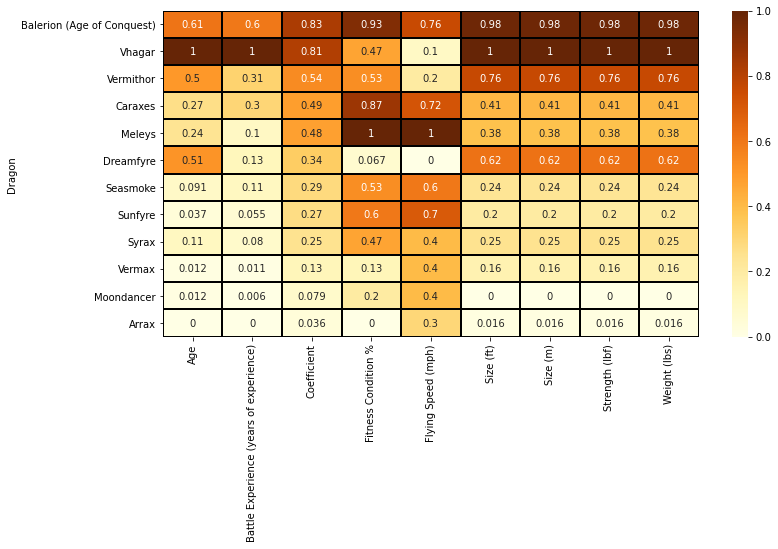

In [14]:
sns.heatmap(df_scaled.pivot_table(index='Dragon').sort_values(by='Coefficient',ascending=False),cmap='YlOrBr',linewidth=1,linecolor='black',annot=True)

## Export to Excel

In [15]:
path = 'HOD_final.xlsx'
writer = pd.ExcelWriter(path, engine='xlsxwriter')
pd.concat([df_raw,df_scaled['Coefficient']],axis=1).to_excel(writer,sheet_name = 'HOD', index=False)
df_scaled.to_excel(writer, sheet_name= 'HODscaled_'+pd.to_datetime('today').strftime('%d%m%y%H%M%S'), index=False )
writer.close()